## HW5 Astro530
### By: Christian Robles

In [1]:
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
from astro530 import Planck_num
from scipy import integrate
from scipy import special
from astropy.modeling.models import BlackBody

In [2]:
sig = const.sigma_sb.cgs.value
pi  = np.pi


In [3]:
# def Source_func(t,T_eff,wn):
#     return (Planck_num(wn/u.micrometer,((T_eff*u.K)*(.75*t+.5)**(.25)))).cgs.value

In [4]:
def Source_func(t,T_eff,wn):
    astropy_planck = BlackBody(temperature=((T_eff*u.K)*(.75*t+.5)**(1/4)))
    return astropy_planck(wn/u.micrometer).cgs.value
    #return (Planck_num(wn/u.micrometer,((T_eff*u.K)*(.75*t+.5)**(.25)))).cgs.value

In [5]:
def F_Integrand(t,sfunction,T_eff,wn):
    return sfunction(t,T_eff,wn)*special.expn(2,t)

In [6]:
def quad_integrate_F(sfunc,T_eff,max,wn):
    results = np.zeros(wn.size)
    for i in range(wn.size):
        results[i],err_first = integrate.quad(F_Integrand,0,max,args=(sfunc,T_eff,wn[i],))
    
    return 2*pi*results


In [33]:
T_eff = 8700
max = 40
#wavenumbers = np.linspace(.1,12,num=100)   #/u.micrometer
wavenumbers = np.logspace(-1,1,num=100)
F = quad_integrate_F(Source_func,T_eff,max,wavenumbers)


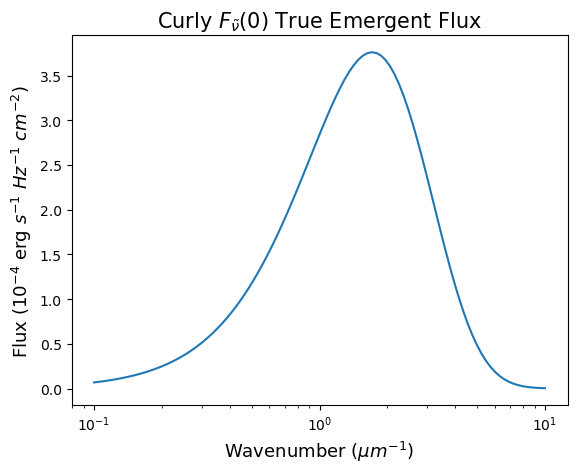

In [60]:
plt.plot(wavenumbers,F*10**4)
plt.ylabel("Flux ($10^{-4}$ erg $s^{-1}$ $Hz^{-1}$ $cm^{-2}$)",fontsize=13)
plt.xlabel("Wavenumber ($\mu m^{-1}$)",fontsize=13)
plt.title('Curly $F_{\\tilde{\\nu}}(0)$ True Emergent Flux',fontsize=15)
plt.xscale('log')
plt.savefig('8b_plot.svg', bbox_inches='tight')
plt.show()

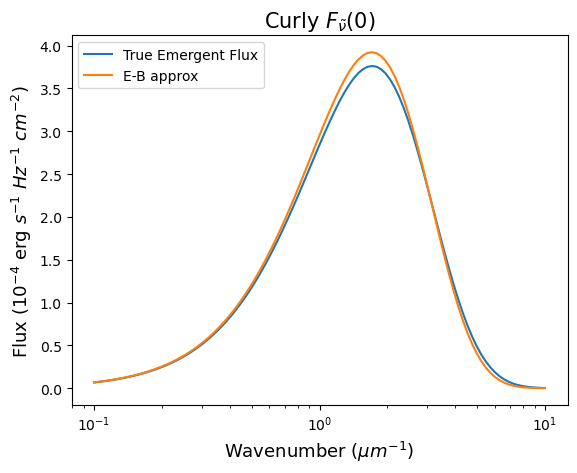

In [61]:
## for E-B F(0)=S(tau=2/3)
ebf = Source_func(2/3,T_eff,wavenumbers)*pi
plt.plot(wavenumbers,F*10**4)
plt.plot(wavenumbers,ebf*10**4)
plt.ylabel("Flux ($10^{-4}$ erg $s^{-1}$ $Hz^{-1}$ $cm^{-2}$)",fontsize=13)
plt.xlabel("Wavenumber ($\mu m^{-1}$)",fontsize=13)
plt.legend(["True Emergent Flux","E-B approx"])
plt.title('Curly $F_{\\tilde{\\nu}}(0)$',fontsize=15)
plt.xscale("log")
plt.savefig('8d_plot.svg', bbox_inches='tight')
plt.show()

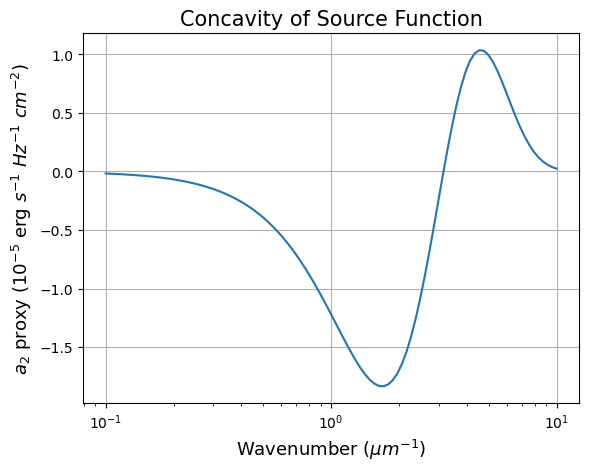

In [58]:
## numerically calc the second derivative of S_v for tau=1
dt=.01
sec_s = (Source_func(1+dt,T_eff,wavenumbers)-2*Source_func(1,T_eff,wavenumbers)+Source_func(1-dt,T_eff,wavenumbers))/(dt**2)
plt.plot(wavenumbers,sec_s*10**5)
plt.ylabel("$a_2$ proxy ($10^{-5}$ erg $s^{-1}$ $Hz^{-1}$ $cm^{-2}$)",fontsize=13)
plt.xlabel("Wavenumber ($\mu m^{-1}$)",fontsize=13)
plt.title('Concavity of Source Function',fontsize=15)
plt.xscale('log')
plt.grid()
plt.savefig('8e_plot.svg', bbox_inches='tight')
plt.show()

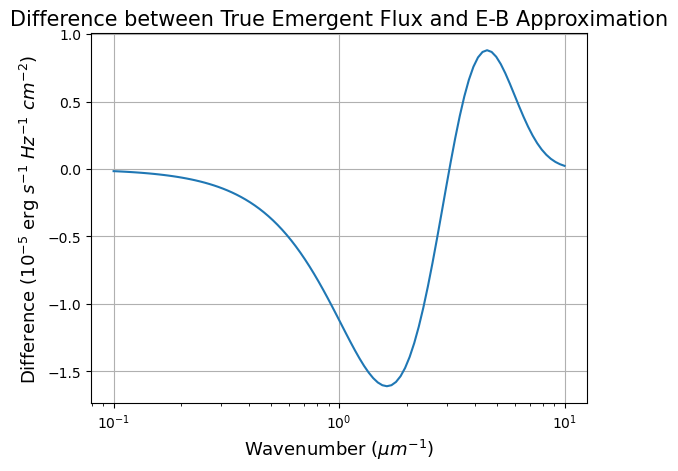

In [59]:
plt.plot(wavenumbers,(F-ebf)*10**5)

plt.ylabel("Difference ($10^{-5}$ erg $s^{-1}$ $Hz^{-1}$ $cm^{-2}$)",fontsize=13)
plt.xlabel("Wavenumber ($\mu m^{-1}$)",fontsize=13)
plt.title('Difference between True Emergent Flux and E-B Approximation',fontsize=15)
plt.xscale("log")
plt.savefig('8dd_plot.svg', bbox_inches='tight')
plt.grid()
plt.show()